# Morphological Additive Decomposition

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import skimage.morphology as skm

In [7]:
def OpenbyRec(input_im,SE=2):
    """Opening by Reconstruction.

    Arguments:
    input_im: numpy array.

    Returns:
    output_im: numpy array, containing reconstruction from eroded images.
    """
    im_mark = np.copy(input_im)
    im_mark = skm.erosion(im_mark,skm.disk(SE))
    out_im = skm.reconstruction(im_mark, input_im)
    return out_im

def ClosebyRec(input_im,SE=2):
    """Closing by Reconstruction

    Arguments:
    input_im: numpy array.

    Returns:
    output_im: numpy array, containing reconstruction from close images.
    """
    c=np.max(input_im)
    input_im=c-input_im
    im_mark = np.copy(input_im)
    im_mark = skm.erosion(im_mark,skm.disk(SE))
    out_im = skm.reconstruction(im_mark, input_im)
    return c-out_im

def AdditiveDecomposition(input_im,levels=4,step=1):
    """Additive Decomposition by Reconstruction
    
    Arguments:
    input_im: numpy array.
    levels: number of levels in the decomposition.
    step: Discretization on the decomposition
    """
    RP=[]
    RN=[]
    SE=2
    for i in range(levels):
        out_im=OpenbyRec(input_im,SE)
        RP.append(input_im-out_im)
        out2_im=ClosebyRec(out_im,SE)
        RN.append(out2_im-out_im)
        input_im=out2_im
        SE=SE+step
    return RP,RN,input_im

In [8]:
from skimage import data
from skimage.color import rgb2gray

#Example 1:
#I=np.random.random([100,100])
#Example 2:
I=data.camera()
#Example 3:
#I = data.astronaut()
#I = rgb2gray(I)
A=OpenbyRec(I)
B=ClosebyRec(I)
RP,RN,S=AdditiveDecomposition(I,levels=10,step=2)

In [9]:
comp1and2 = OpenbyRec(OpenbyRec(I,SE=1), SE=2)
comp2and1 = OpenbyRec(OpenbyRec(I,SE=2), SE=1)
rec2 = OpenbyRec(I, SE=2)
print(np.all(comp2and1 == comp1and2))
print(np.all(comp2and1 == rec2))
print(np.all(comp1and2 == rec2))

True
True
True


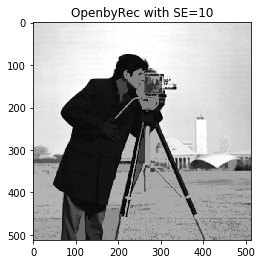

In [16]:
plt.imshow(OpenbyRec(I, SE=10),cmap='gray')
plt.title('OpenbyRec with SE=10')
plt.show()

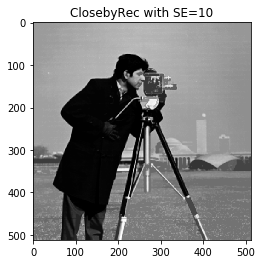

In [15]:
plt.imshow(ClosebyRec(I, SE=10),cmap='gray')
plt.title('ClosebyRec with SE=10')
plt.show()

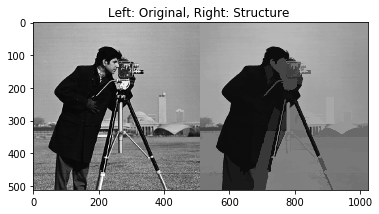

In [4]:
plt.imshow(np.concatenate([I,S],axis=1),cmap='gray')
plt.title('Left: Original, Right: Structure ')
plt.show()

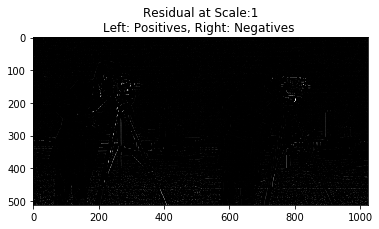

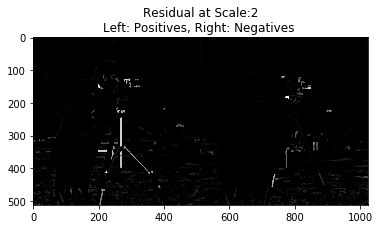

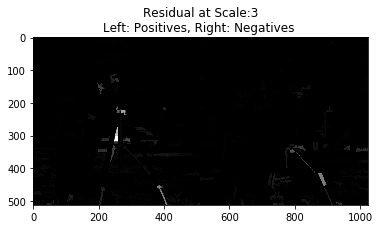

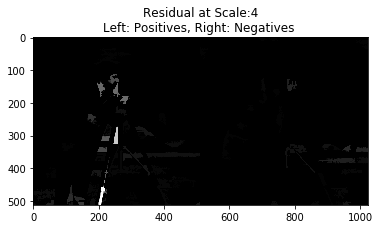

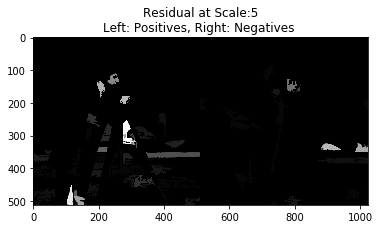

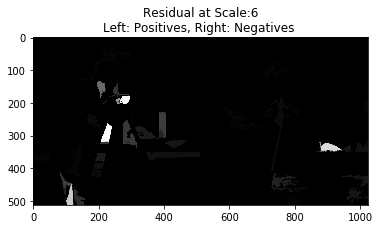

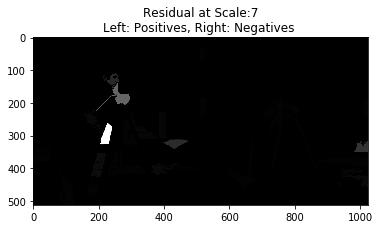

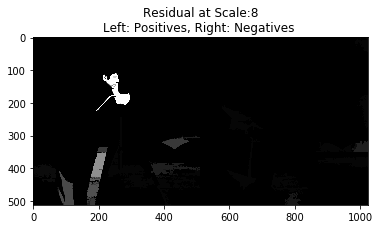

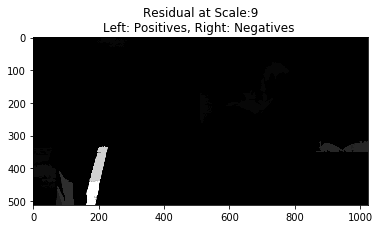

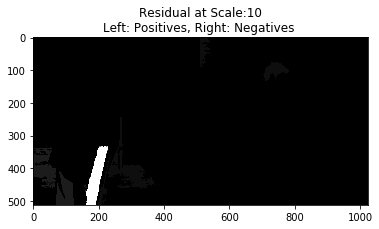

In [5]:
iteri=1
for Ri,Ri2 in zip(RP,RN):
    plt.imshow(np.concatenate([Ri,Ri2],axis=1),cmap='gray')
    plt.title('Residual at Scale:'+str(iteri)+'\nLeft: Positives, Right: Negatives ')
    plt.show()
    iteri+=1

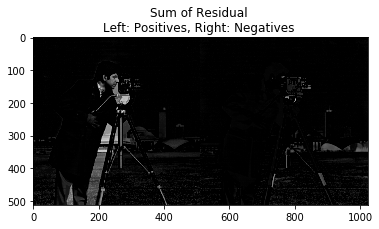

In [6]:
P=0
N=0
for Ri,Ri2 in zip(RP,RN):
    P=P+Ri
    N=N+Ri2
plt.imshow(np.concatenate([P,N],axis=1),cmap='gray')
plt.title('Sum of Residual \nLeft: Positives, Right: Negatives ')
plt.show()

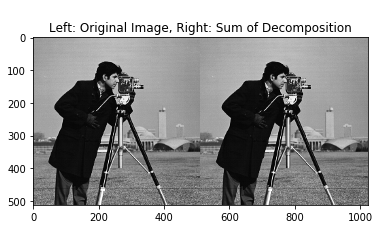

In [7]:
plt.imshow(np.concatenate([P-N+S,I],axis=1),cmap='gray')
plt.title('\nLeft: Original Image, Right: Sum of Decomposition')
plt.show()

In [8]:
print('Is the decomposition exact?(It should be zero)',np.max(P-N+S-I))

Is the decomposition exact?(It should be zero) 0.0


In [9]:
rec = P -N + S

In [12]:
print('Is the decomposition exact?',np.alltrue(rec==I))

Is the decomposition exact? True
